In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

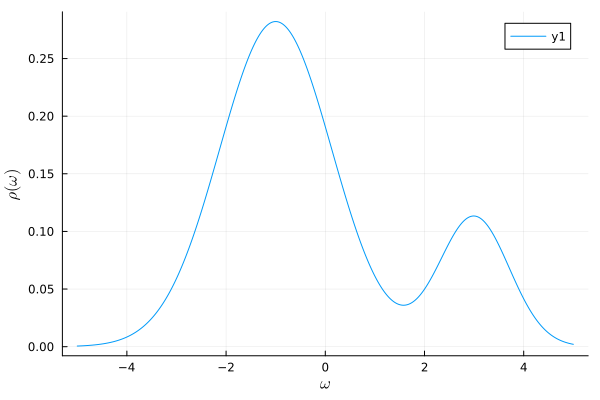

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [13]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     1.394068e-01     1.354674e+00
 * time: 0.019032955169677734
     1     1.271921e-01     8.719071e-01
 * time: 1.1204719543457031
     2     9.446336e-02     9.728176e-01
 * time: 1.3298020362854004
     3     4.352172e-02     1.124699e+00
 * time: 1.5153288841247559
     4     3.614140e-02     6.164562e-02
 * time: 1.6632499694824219
     5     3.610852e-02     1.054229e-02
 * time: 1.9398560523986816
     6     3.610750e-02     1.921777e-03
 * time: 2.1827778816223145
     7     3.610748e-02     1.512958e-04
 * time: 2.3876729011535645
     8     3.610748e-02     2.197711e-05
 * time: 2.6262869834899902
     9     3.610748e-02     4.523937e-06
 * time: 2.817060947418213
    10     3.610748e-02     6.640354e-07
 * time: 2.988173007965088
    11     3.610748e-02     1.213906e-07
 * time: 3.2671749591827393
    12     3.610748e-02     1.825283e-08
 * time: 3.454385995864868
    13     3.610748e-02     3.485925

In [14]:
#execute optimize
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     3.610748e-02     3.485925e-09
 * time: 0.0002238750457763672
max_theta=0.07656815618787277843167094722571857204341
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.610748e-02     4.607507e-01
 * time: 0.00035309791564941406
     1     3.458019e-02     3.832203e-01
 * time: 0.24231505393981934
     2     2.842299e-02     3.094581e-01
 * time: 0.5217769145965576
     3     2.588584e-02     2.989854e-01
 * time: 0.7266499996185303
     4     1.616310e-02     6.775993e-01
 * time: 0.9367280006408691
     5     1.152500e-02     1.850161e-01
 * time: 1.1690471172332764
     6     1.100075e-02     6.844742e-02
 * time: 1.4955120086669922
     7     1.081305e-02     3.099662e-02
 * time: 1.8089430332183838
     8     1.079639e-02     1.175092e-02
 * time: 2.127129077911377
     9     1.079535e-02     3.198604e-03
 * time: 2.4200680255889893
    10     1.079526e-02     9.616927e-04
 * time: 2.627573

     8     3.541879e-04     1.202338e-02
 * time: 2.469564914703369
     9     3.317255e-04     1.335290e-02
 * time: 2.9200680255889893
    10     2.745317e-04     3.095028e-02
 * time: 3.3427939414978027
    11     2.227564e-04     1.468464e-02
 * time: 3.7590620517730713
    12     2.109885e-04     1.550989e-02
 * time: 4.166973114013672
    13     1.980827e-04     7.102639e-03
 * time: 4.606534957885742
    14     1.965369e-04     5.610650e-03
 * time: 5.013880968093872
    15     1.949621e-04     7.294491e-03
 * time: 5.474452018737793
    16     1.938476e-04     9.328859e-03
 * time: 6.070472002029419
    17     1.909921e-04     1.423532e-02
 * time: 6.596257925033569
    18     1.885461e-04     9.508340e-03
 * time: 7.248847007751465
    19     1.872132e-04     2.752278e-03
 * time: 7.813436031341553
    20     1.869741e-04     2.491821e-03
 * time: 8.18994402885437
    21     1.868090e-04     2.037686e-03
 * time: 8.800909042358398
    22     1.863064e-04     6.669543e-03
 * ti

    31     3.658214e-05     1.812335e-03
 * time: 16.74883484840393
    32     3.654232e-05     1.097643e-03
 * time: 17.24030590057373
    33     3.653096e-05     2.957180e-04
 * time: 17.575305938720703
    34     3.652719e-05     2.805534e-04
 * time: 18.04667091369629
    35     3.652305e-05     5.900462e-04
 * time: 18.534199953079224
    36     3.651569e-05     8.711236e-04
 * time: 19.015962839126587
    37     3.650492e-05     1.293413e-03
 * time: 19.518001794815063
    38     3.648455e-05     1.906224e-03
 * time: 19.97004199028015
    39     3.645302e-05     2.601490e-03
 * time: 20.47982692718506
    40     3.639626e-05     3.719350e-03
 * time: 20.96971893310547
    41     3.631136e-05     4.815348e-03
 * time: 21.478646993637085
    42     3.615692e-05     6.426831e-03
 * time: 21.949704885482788
    43     3.593308e-05     7.807435e-03
 * time: 22.40317177772522
    44     3.552534e-05     9.436206e-03
 * time: 22.88413977622986
    45     3.493243e-05     9.758930e-03
 

     9     2.049205e-05     9.475907e-04
 * time: 3.726138114929199
    10     2.041267e-05     9.157819e-04
 * time: 4.244007110595703
    11     2.028044e-05     1.894858e-03
 * time: 4.628490924835205
    12     2.014403e-05     3.936039e-04
 * time: 5.124485969543457
    13     2.007649e-05     3.635523e-04
 * time: 5.448429107666016
    14     1.964882e-05     1.439704e-03
 * time: 5.992090940475464
    15     1.943455e-05     9.431024e-04
 * time: 6.708302974700928
    16     1.939733e-05     1.213223e-03
 * time: 7.875339031219482
    17     1.933880e-05     1.621055e-03
 * time: 9.466334104537964
    18     1.930072e-05     1.421333e-03
 * time: 10.153581142425537
    19     1.924451e-05     1.385487e-03
 * time: 11.036524057388306
    20     1.912405e-05     1.414850e-03
 * time: 11.6892671585083
    21     1.893356e-05     1.600937e-03
 * time: 12.189254999160767
    22     1.889515e-05     1.630658e-03
 * time: 12.52171015739441
    23     1.883638e-05     1.723667e-03
 * ti

LoadError: InterruptException:

In [15]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31


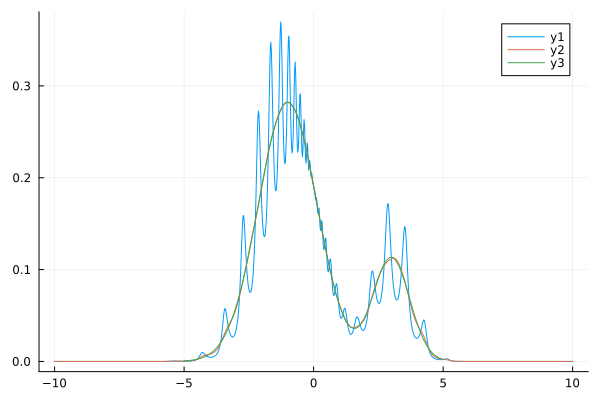

In [16]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [11]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined